In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from collections import Counter
from tqdm import tqdm_notebook as tqdm

import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from    keras.callbacks   import ModelCheckpoint 

%matplotlib inline


/home/ania/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
amz_review=pd.read_csv('Reviews.csv')

In [3]:
amz_review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
amz_review.shape

(568454, 10)

In [5]:
amz_review['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [6]:
amz_review['Summary'][0]

'Good Quality Dog Food'

In [7]:
amz_review.groupby(by=['UserId','ProductId']).count().sort_values(by=['Text'],ascending=False).head(25)

Id  ProfileName  HelpfulnessNumerator  \
UserId         ProductId                                           
A29JUMRL1US6YP B000WFKWDI  11           11                    11   
               B000WFU8O6  11           11                    11   
               B000WFN0VO  11           11                    11   
               B000WFORH0  11           11                    11   
               B000WFKI82  11           11                    11   
               B000WFEN74  11           11                    11   
               B000WFPJIG  11           11                    11   
               B000WFRQQ4  11           11                    11   
               B00008CQVA  11           11                    11   
               B000084EZ4  11           11                    11   
               B000WFUL3E  11           11                    11   
A3TVZM3ZIXG8YW B003M60K54  10           10                    10   
               B000084DWM  10           10                    10   
               B001VIY8BW  10           10                    10   
               B000QSN7P6  10           10                    10   
               B003ANFMY8  10           10                    10   
               B003BJOORW  10           10                    10   
               B003M5TG28  10           10                    10   
               B001VIYCK4  10           10                    10   
               B003MA8P02  10           10                    10   
               B0002MLA5K  10           10                    10   
               B003MW7858  10           10                    10   
               B003MWBFMK  10           10                    10   
               B003MWBFXY  10           10                    10   
               B003WK0D8O  10           10                    10   

                           HelpfulnessDenominator  Score  Time  Summary  Text  
UserId         ProductId                                                       
A29JUMRL1US6YP B000WFKWDI                      11     11    11       11    11  
               B000WFU8O6                      11     11    11       11    11  
               B000WFN0VO                      11     11    11       11    11  
               B000WFORH0                      11     11    11       11    11  
               B000WFKI82                      11     11    11       11    11  
               B000WFEN74                      11     11    11       11    11  
               B000WFPJIG                      11     11    11       11    11  
               B000WFRQQ4                      11     11    11       11    11  
               B00008CQVA                      11     11    11       11    11  
               B000084EZ4                      11     11    11       11    11  
               B000WFUL3E                      11     11    11       11    11  
A3TVZM3ZIXG8YW B003M60K54                      10     10    10       10    10  
               B000084DWM                      10     10    10       10    10  
               B001VIY8BW                      10     10    10       10    10  
               B000QSN7P6                      10     10    10       10    10  
               B003ANFMY8                      10     10    10       10    10  
               B003BJOORW                      10     10    10       10    10  
               B003M5TG28                      10     10    10       10    10  
               B001VIYCK4                      10     10    10       10    10  
               B003MA8P02                      10     10    10       10    10  
               B0002MLA5K                      10     10    10       10    10  
               B003MW7858                      10     10    10       10    10  
               B003MWBFMK                      10     10    10       10    10  
               B003MWBFXY                      10     10    10       10    10  
               B003WK0D8O                      10     10    10       10    10

In [8]:
((amz_review.groupby(by=['UserId','ProductId']).count().sort_values(by=['Text'],ascending=False)>1)==True).sum()

Id                        5859
ProfileName               5859
HelpfulnessNumerator      5859
HelpfulnessDenominator    5859
Score                     5859
Time                      5859
Summary                   5859
Text                      5859
dtype: int64

In [9]:
amz_review['Text_lenght']=amz_review['Text'].apply(lambda col: len(col.split(' ')))

In [10]:
amz_review.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Text_lenght'],
      dtype='object')

(0, 10)

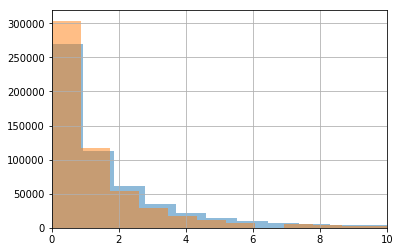

In [11]:
amz_review['HelpfulnessDenominator'].hist(bins=1000,alpha=0.5);
amz_review['HelpfulnessNumerator'].hist(bins=1000,alpha=0.5);
plt.xlim(0,10)

(100, 1000)

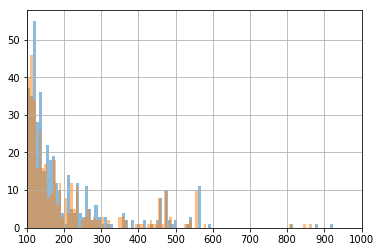

In [12]:
amz_review[amz_review['HelpfulnessDenominator']>100]['HelpfulnessDenominator'].hist(bins=100,alpha=0.5);
amz_review[amz_review['HelpfulnessNumerator']>100]['HelpfulnessNumerator'].hist(bins=100,alpha=0.5);
plt.xlim(100,1000)

(0, 400)

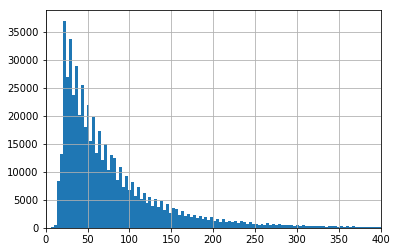

In [13]:
amz_review['Text_lenght'].hist(bins=1000);
plt.xlim(0,400)

In [14]:
amz_review['Time_converted']=amz_review['Time'].apply(lambda col: datetime.utcfromtimestamp(int(col)).strftime('%Y-%m-%d'))
#strftime('%Y-%m-%d %H:%M:%S'))
amz_review['Time_converted_ym']=amz_review['Time'].apply(lambda col: datetime.utcfromtimestamp(int(col)).strftime('%Y-%m'))

In [15]:
amz_review['Time_converted'].max()

'2012-10-26'

In [16]:
amz_review['Time_converted'].min()

'1999-10-08'

In [19]:
#had to remove time since same revireer/item had more than same time frame unfortunately and keeping time in subset would not clean them

amz_review_sorted_drop_duplicated=amz_review.drop_duplicates(subset=['UserId','ProductId'], keep='first', inplace=False)

In [20]:
amz_review_sorted_drop_duplicated.shape

(560804, 13)

In [21]:
((amz_review_sorted_drop_duplicated.groupby(by=['UserId','ProductId']).count().sort_values(by=['Text'],ascending=False)>1)==True).sum()

Id                        0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Text_lenght               0
Time_converted            0
Time_converted_ym         0
dtype: int64

In [22]:
amz_review_sorted_drop_duplicated.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
Text_lenght                0
Time_converted             0
Time_converted_ym          0
dtype: int64

In [23]:
#clean cells in review that are parsed by mistake and still have html heading "<span "

def clean_span(col):  
    
    if('<span' not in col.lower()):

        return col.lower()

In [24]:
#pd.options.mode.chained_assignment = None
amz_review_sorted_drop_duplicated['Text_new']=amz_review_sorted_drop_duplicated['Text'].apply(clean_span)

/home/ania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
amz_review_sorted_drop_duplicated.isnull().sum()

Id                          0
ProductId                   0
UserId                      0
ProfileName                16
HelpfulnessNumerator        0
HelpfulnessDenominator      0
Score                       0
Time                        0
Summary                    27
Text                        0
Text_lenght                 0
Time_converted              0
Time_converted_ym           0
Text_new                  373
dtype: int64

In [26]:
amz_review_sorted_drop_duplicated.dropna(inplace=True)

/home/ania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
amz_review_sorted_drop_duplicated.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Text_lenght               0
Time_converted            0
Time_converted_ym         0
Text_new                  0
dtype: int64

In [33]:
amz_review_sorted_drop_duplicated.shape

(560388, 14)

In [28]:
stop_word_list =[]
for word in open('stopword_short_long_mod.txt'):
    #print(word)
    stop_word_list.append(word.replace('\n',''))
    
stop_word_list=list(set(stop_word_list))   
len(stop_word_list)

642

In [29]:
#special characters
special_char_list=['\\','`','\"',"'",'*','_','{','}','[',']','(',')',';','@','^','&','>','#','+',':','-','_','=','|','>','<','~','.','!','$','/',',','?','%','0','1','2','3','4','5','6','7','8','9']

In [30]:
def remove_stopword(col):
        #print(stop_word_list)
        col_list=[]
        txt_col_split=col.lower().replace('\n'," ").strip().split(" ")
        #print(txt_col_split)
        for word_ in txt_col_split:
              
            if ((word_ not in stop_word_list) and len(word)>3):
                #col=col.replace(word,"") #.replace("  "," ")
                #print(col)
                col_list.append(word_)

        return (col_list)             
                
def remove_specialchar(col):
        #print(stop_word_list)
        for word in special_char_list:
            
            if word in col: #col.split(" "):
                col=col.replace(word,"").replace("  "," ")
                #print(col)

        return col                  
    


In [31]:
amz_review_sorted_drop_duplicated['Text_new2']=amz_review_sorted_drop_duplicated['Text_new'].apply(remove_specialchar)

/home/ania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
amz_review_sorted_drop_duplicated['Text_new2']=amz_review_sorted_drop_duplicated['Text_new2'].apply(remove_stopword)

/home/ania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
amz_review_sorted_drop_duplicated['Text_new2'][0]

['bought',
 'vitality',
 'canned',
 'dog',
 'food',
 'products',
 'good',
 'quality',
 'product',
 'like',
 'stew',
 'processed',
 'meat',
 'smells',
 'better',
 'labrador',
 'finicky',
 'appreciates',
 'product',
 'better']

In [35]:
amz_review_sorted_drop_duplicated.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Text_lenght               0
Time_converted            0
Time_converted_ym         0
Text_new                  0
Text_new2                 0
dtype: int64

In [36]:
#amz_review_sorted_drop_duplicated.dtypes

In [37]:
def score_pos_neg(col):
    
    if col>3:
        return 1
    else:
        return 0
    

In [38]:
amz_review_sorted_drop_duplicated['score_pos_neg']=amz_review_sorted_drop_duplicated['Score'].apply(score_pos_neg)

/home/ania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


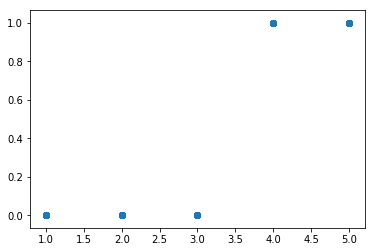

In [39]:
plt.scatter(amz_review_sorted_drop_duplicated['Score'],amz_review_sorted_drop_duplicated['score_pos_neg'])

In [40]:
amz_review_sorted_drop_duplicated.to_csv('amazon_review_parsed.csv',index=False)

In [83]:
amz_review_sorted_drop_duplicated.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_lenght,Time_converted,Time_converted_ym,Text_new,Text_new2,Text_new3,score_pos_neg
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,2011-04-27,2011-04,i have bought several of the vitality canned d...,i have bought several of the vitality canned d...,"[bought, vitality, canned, dog, food, products...",1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,2012-09-07,2012-09,product arrived labeled as jumbo salted peanut...,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea...",0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,99,2008-08-18,2008-08,this is a confection that has been around a fe...,this is a confection that has been around a fe...,"[confection, centuries, light, pillowy, citrus...",1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,43,2011-06-13,2011-06,if you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...,"[secret, ingredient, robitussin, addition, roo...",0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,30,2012-10-21,2012-10,great taffy at a great price. there was a wid...,great taffy at a great price there was a wide ...,"[great, taffy, great, price, wide, assortment,...",1


(0, 20)

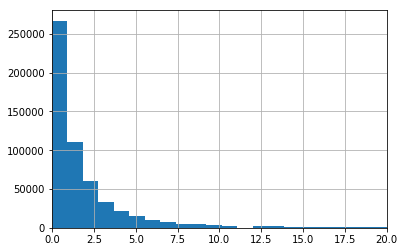

In [41]:
amz_review_sorted_drop_duplicated['HelpfulnessDenominator'].hist(bins=1000);
plt.xlim(0,20)

In [42]:
user_number_review=amz_review_sorted_drop_duplicated.groupby(by=['UserId']).count().sort_values(by=['Text'],ascending=False)
#amz_review_sorted_drop_duplicated.groupby(by=['UserId']).mean()
user_number_review.head()

,Id,ProductId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_lenght,Time_converted,Time_converted_ym,Text_new,Text_new2,score_pos_neg
UserId,,,,,,,,,,,,,,,
A3OXHLG6DIBRW8,419,419,419,419,419,419,419,419,419,419,419,419,419,419,419
AY12DBB0U420B,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382
A281NPSIMI1C2R,321,321,321,321,321,321,321,321,321,321,321,321,321,321,321
A1YUL9PCJR3JTY,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308
A1Z54EM24Y40LL,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251


In [44]:
user_top_reviewer=user_number_review[user_number_review['Id']>10][['Id']]
user_top_reviewer.head(10)   #11 to 419

,Id
UserId,
A3OXHLG6DIBRW8,419
AY12DBB0U420B,382
A281NPSIMI1C2R,321
A1YUL9PCJR3JTY,308
A1Z54EM24Y40LL,251
A2MUGFV2TDQ47K,201
AZV26LP92E6WU,167
AQQLWCMRNDFGI,167
A1UQBFCERIP7VJ,157


In [45]:
user_top_reviewer.to_csv('amazon_top_reviewer_list.csv')

In [54]:
amz_review_sorted_drop_duplicated.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_lenght,Time_converted,Time_converted_ym,Text_new,Text_new2,score_pos_neg
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,2011-04-27,2011-04,i have bought several of the vitality canned d...,"[bought, vitality, canned, dog, food, products...",1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,2012-09-07,2012-09,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea...",0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,99,2008-08-18,2008-08,this is a confection that has been around a fe...,"[confection, centuries, light, pillowy, citrus...",1


In [68]:
user_average_info=amz_review_sorted_drop_duplicated.groupby(by=['UserId']).mean() #['UserId']  #=='A3OXHLG6DIBRW8' #.sort_values(by=['Text'],ascending=False)

In [69]:
user_average_info.head()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text_lenght,score_pos_neg
UserId,,,,,,,
#oc-R103C0QSV1DF5E,136323.0,1.0,2.0,5.0,1.343088e+09,56.0,1.0
#oc-R109MU5OBBZ59U,516062.0,0.0,1.0,5.0,1.350086e+09,21.0,1.0
#oc-R10LFEMQEW6QGZ,516079.0,0.0,1.0,5.0,1.345939e+09,85.0,1.0
#oc-R10LT57ZGIB140,378693.0,0.0,0.0,3.0,1.310602e+09,45.0,0.0
#oc-R10UA029WVWIUI,136545.0,0.0,0.0,1.0,1.342483e+09,66.0,0.0


In [107]:
user_average_info.to_csv('amazon_reviewer_avg_info.csv')

In [70]:
user_top_reviewer.head()

,Id
UserId,
A3OXHLG6DIBRW8,419
AY12DBB0U420B,382
A281NPSIMI1C2R,321
A1YUL9PCJR3JTY,308
A1Z54EM24Y40LL,251


In [96]:
top_reviewer_avg_data=pd.merge(user_average_info,user_top_reviewer,how='inner',on='UserId')


In [97]:
top_reviewer_avg_data['ratio_helpful']=top_reviewer_avg_data['HelpfulnessNumerator']/top_reviewer_avg_data['HelpfulnessDenominator']

In [190]:
top_reviewer_avg_data.head()

,Id_x,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text_lenght,score_pos_neg,Id_y,ratio_helpful,Time_converted
UserId,,,,,,,,,,
A100WO06OQR8BQ,295215.290909,0.836364,2.418182,3.109091,1.315171e+09,166.418182,0.400000,55,0.345865,2011-09
A101P2KHWCU0G6,306505.230769,0.346154,1.653846,2.038462,1.338788e+09,287.923077,0.346154,26,0.209302,2012-06
A102UXGLDF76G1,262626.636364,0.363636,0.545455,4.818182,1.243296e+09,91.272727,0.909091,11,0.666667,2009-05
A105S56ODHGJEK,296723.888889,0.111111,0.555556,3.222222,1.286256e+09,159.666667,0.444444,18,0.200000,2010-10
A106Q1A6LGU4DP,225461.307692,2.615385,2.846154,4.307692,1.322106e+09,149.538462,0.769231,13,0.918919,2011-11


In [142]:
top_reviewer_avg_data['Time'][0]

1315171374.5454545

In [144]:
top_reviewer_avg_data['Time_converted']=top_reviewer_avg_data['Time'].apply(lambda col: datetime.utcfromtimestamp(int(col)).strftime('%Y-%m'))

In [99]:
top_reviewer_avg_data=top_reviewer_avg_data[(top_reviewer_avg_data['ratio_helpful']>0.0) & (top_reviewer_avg_data['ratio_helpful']<1.0)]

In [314]:
top_reviewer_avg_data.head()

,Id_x,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text_lenght,score_pos_neg,Id_y,ratio_helpful,Time_converted
UserId,,,,,,,,,,
A100WO06OQR8BQ,295215.290909,0.836364,2.418182,3.109091,1.315171e+09,166.418182,0.400000,55,0.345865,2011-09
A101P2KHWCU0G6,306505.230769,0.346154,1.653846,2.038462,1.338788e+09,287.923077,0.346154,26,0.209302,2012-06
A102UXGLDF76G1,262626.636364,0.363636,0.545455,4.818182,1.243296e+09,91.272727,0.909091,11,0.666667,2009-05
A105S56ODHGJEK,296723.888889,0.111111,0.555556,3.222222,1.286256e+09,159.666667,0.444444,18,0.200000,2010-10
A106Q1A6LGU4DP,225461.307692,2.615385,2.846154,4.307692,1.322106e+09,149.538462,0.769231,13,0.918919,2011-11


In [133]:
colors = np.random.rand(top_reviewer_avg_data.shape[0])

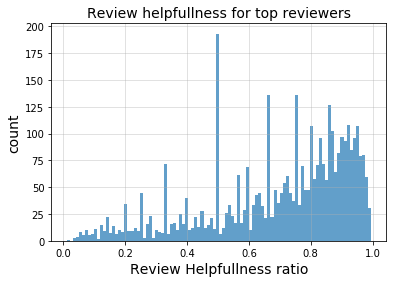

In [301]:
top_reviewer_avg_data['ratio_helpful'].hist(bins=100,label='review helpfullness top reviewers',alpha=0.7);
#plt.scatter(top_reviewer_avg_data['Text_lenght'],top_reviewer_avg_data['ratio_helpful'])
plt.xlabel('Review Helpfullness ratio',fontsize=14);
plt.ylabel('count',fontsize=14);

#plt.legend()
plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Review helpfullness for top reviewers',fontsize=14);
plt.savefig('helpfullness_top_reviewer_dist.png')

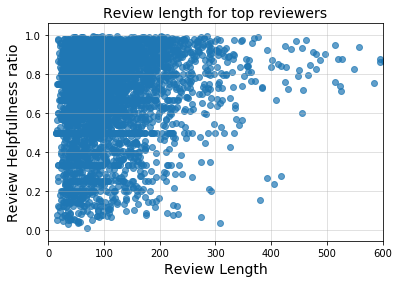

In [300]:
plt.scatter(top_reviewer_avg_data['Text_lenght'],top_reviewer_avg_data['ratio_helpful'],alpha=0.7);
plt.xlim(0,600);
plt.xlabel('Review Length',fontsize=14);
plt.ylabel('Review Helpfullness ratio',fontsize=14);
#plt.legend()
plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Review length for top reviewers',fontsize=14);
plt.savefig('helpfullness_top_reviewer_length.png')

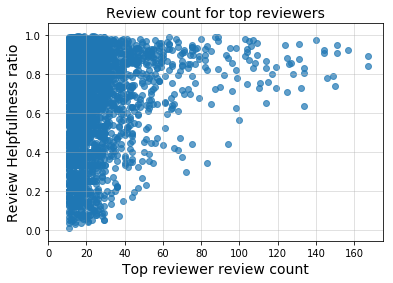

In [303]:
plt.scatter(top_reviewer_avg_data['Id_y'],top_reviewer_avg_data['ratio_helpful'],alpha=0.7);
plt.xlim(0,175);
plt.xlabel('Top reviewer review count',fontsize=14);
plt.ylabel('Review Helpfullness ratio',fontsize=14);

#plt.legend()
plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Review count for top reviewers',fontsize=14);
plt.savefig('helpfullness_top_reviewer_count.png')

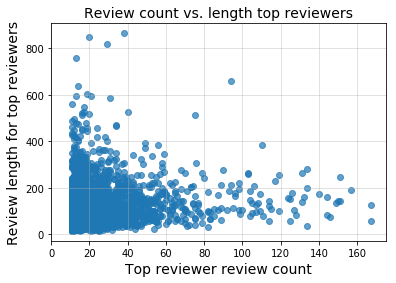

In [304]:
plt.scatter(top_reviewer_avg_data['Id_y'],top_reviewer_avg_data['Text_lenght'],alpha=0.7); #,c=top_reviewer_avg_data['ratio_helpful'])
plt.xlim(0,175);

plt.xlabel('Top reviewer review count',fontsize=14);
plt.ylabel('Review length for top reviewers',fontsize=14);

#plt.legend()
plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Review count vs. length top reviewers',fontsize=14);
plt.savefig('helpfullness_top_reviewer_length_count.png')

In [254]:
grp_s1=amz_review_sorted_drop_duplicated[amz_review_sorted_drop_duplicated['Score']==1]
grp_s2=amz_review_sorted_drop_duplicated[amz_review_sorted_drop_duplicated['Score']==2]
grp_s3=amz_review_sorted_drop_duplicated[amz_review_sorted_drop_duplicated['Score']==3]
grp_s4=amz_review_sorted_drop_duplicated[amz_review_sorted_drop_duplicated['Score']==4]
grp_s5=amz_review_sorted_drop_duplicated[amz_review_sorted_drop_duplicated['Score']==5]

grp_date_1=grp_s1.groupby(by=['Time_converted_ym']).count();
grp_date_2=grp_s2.groupby(by=['Time_converted_ym']).count();
grp_date_3=grp_s3.groupby(by=['Time_converted_ym']).count();
grp_date_4=grp_s4.groupby(by=['Time_converted_ym']).count();
grp_date_5=grp_s5.groupby(by=['Time_converted_ym']).count();

grp_date_1.reset_index(inplace=True); #to make it to column
grp_date_2.reset_index(inplace=True);
grp_date_3.reset_index(inplace=True);
grp_date_4.reset_index(inplace=True);
grp_date_5.reset_index(inplace=True);

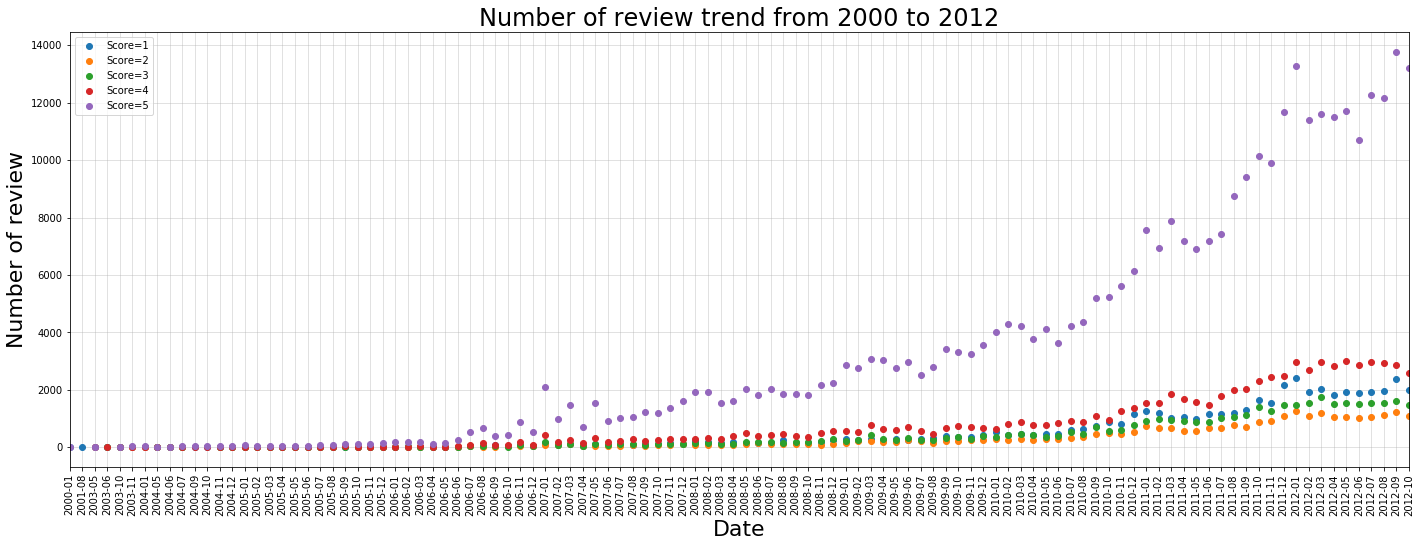

In [263]:
plt.figure(figsize=(24,8))

plt.plot_date(x=grp_date_1['Time_converted_ym'],y=grp_date_1['Score'],label='Score=1');
plt.plot_date(x=grp_date_2['Time_converted_ym'],y=grp_date_2['Score'],label='Score=2');
plt.plot_date(x=grp_date_3['Time_converted_ym'],y=grp_date_3['Score'],label='Score=3');
plt.plot_date(x=grp_date_4['Time_converted_ym'],y=grp_date_4['Score'],label='Score=4');
plt.plot_date(x=grp_date_5['Time_converted_ym'],y=grp_date_5['Score'],label='Score=5');
plt.xticks(rotation=90);
plt.legend()
plt.grid(linewidth=0.5,alpha=0.75)
plt.xlim('2000-01','2012-10');
plt.xlabel('Date',fontsize=22)
plt.ylabel('Number of review',fontsize=22)
plt.title('Number of review trend from 2000 to 2012',fontsize=24);
plt.savefig('data_review_trend.png')
#grp_date

In [279]:
#amz_review_sorted_drop_duplicated(by=['Time_converted_ym']).count()
grp_avg_date=amz_review_sorted_drop_duplicated.groupby(by=['Time_converted_ym']).mean()
grp_avg_date.reset_index(inplace=True);
grp_avg_date['Helpfulness_ratio']=grp_avg_date['HelpfulnessNumerator']/grp_avg_date['HelpfulnessDenominator']

In [281]:
grp_avg_date.isnull().sum()

Time_converted_ym         0
Id                        0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Text_lenght               0
score_pos_neg             0
Helpfulness_ratio         0
dtype: int64

In [282]:
grp_avg_date.head()

,Time_converted_ym,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text_lenght,score_pos_neg,Helpfulness_ratio
0,1999-10,150512.500000,1.000,1.000,5.0,940075200.0,81.50,1.000,1.000000
1,1999-12,377094.500000,0.750,1.500,5.0,944352000.0,35.75,1.000,0.500000
2,2000-01,330241.500000,7.875,9.375,3.5,947797200.0,51.00,0.625,0.840000
3,2000-02,352267.666667,2.000,3.000,4.0,951523200.0,244.00,1.000,0.666667
4,2000-06,211823.600000,3.400,4.800,5.0,960785280.0,42.60,1.000,0.708333


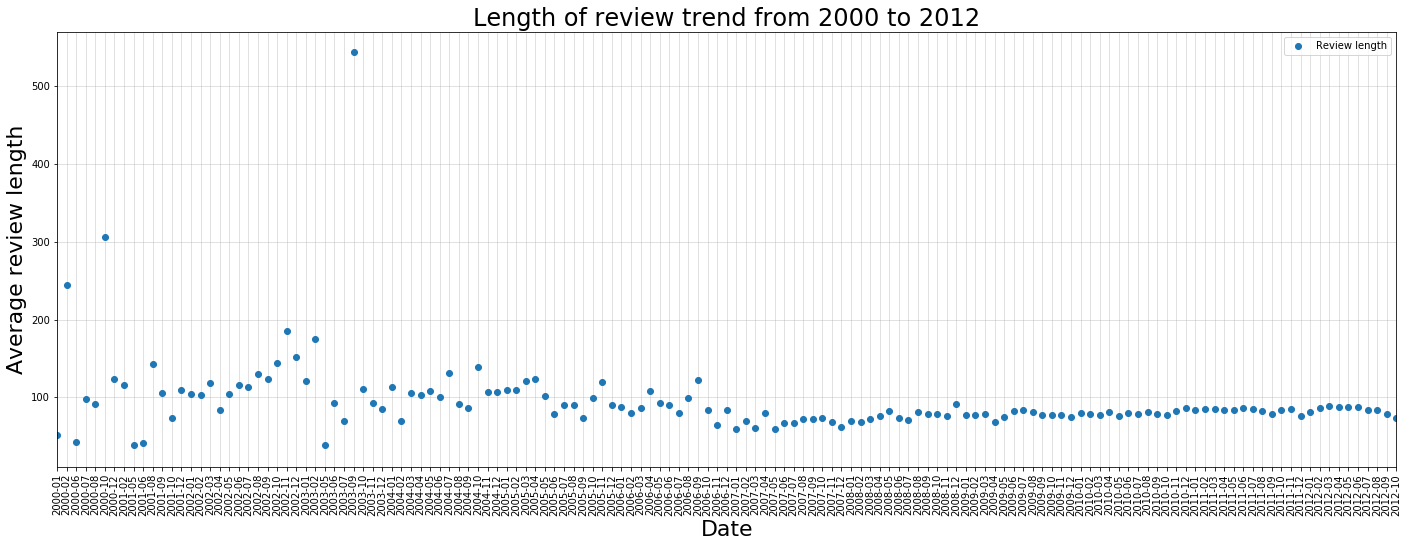

In [287]:
plt.figure(figsize=(24,8))
plt.plot_date(x=grp_avg_date['Time_converted_ym'],y=grp_avg_date['Text_lenght'],label='Review length');
plt.xticks(rotation=90);
plt.legend()
plt.grid(linewidth=0.5,alpha=0.75)
plt.xlim('2000-01','2012-10');
plt.xlabel('Date',fontsize=22)
plt.ylabel('Average review length',fontsize=22)
plt.title('Length of review trend from 2000 to 2012',fontsize=24);
plt.savefig('data_review_length_trend.png')
#stable review length

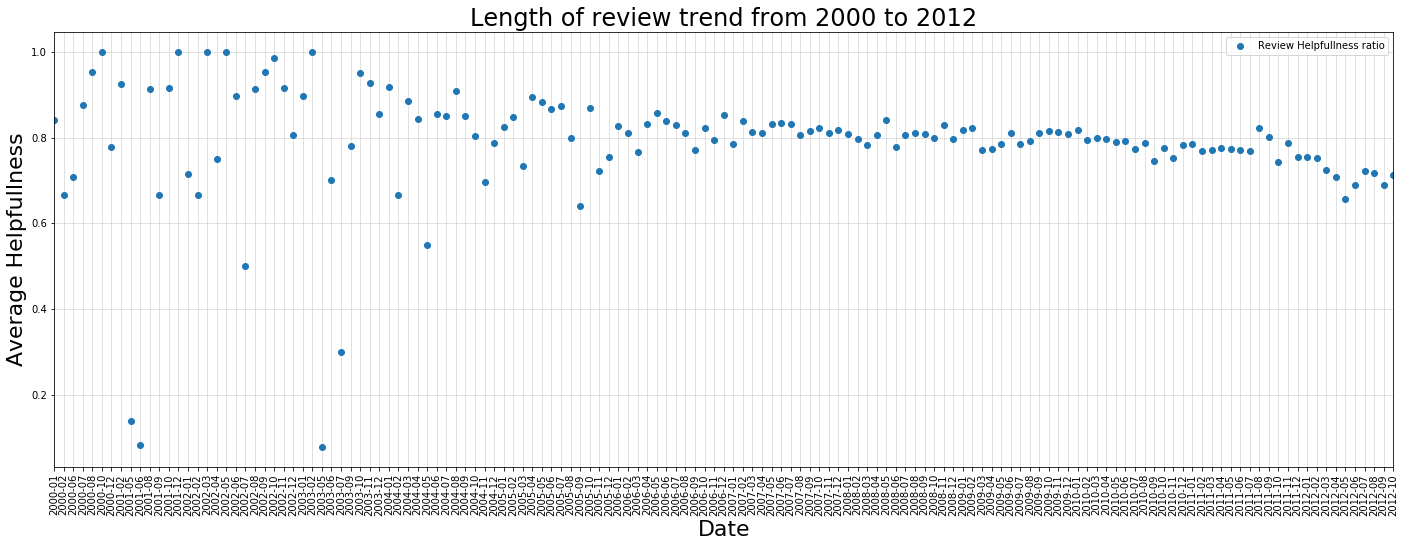

In [288]:
plt.figure(figsize=(24,8))
plt.plot_date(x=grp_avg_date['Time_converted_ym'],y=grp_avg_date['Helpfulness_ratio'],label='Review Helpfullness ratio');
plt.xticks(rotation=90);
plt.legend()
plt.grid(linewidth=0.5,alpha=0.75)
plt.xlim('2000-01','2012-10');
plt.xlabel('Date',fontsize=22)
plt.ylabel('Average Helpfullness',fontsize=22)
plt.title('Review Helpfullness from 2000 to 2012',fontsize=24);
plt.savefig('data_review_helpful_trend.png')

#drop can be due to visitor not getting time yet to check the reviews of 2012

In [315]:
top_reviewer_avg_data.to_csv('top_reviewer_avg_data.csv',index=False)

grp_avg_date.to_csv('grp_avg_date.csv',index=False)

In [126]:
check_name=pd.read_csv('amazon_top_reviewer_list.csv')

In [318]:
amz_review_sorted_drop_duplicated.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Text_lenght', 'Time_converted', 'Time_converted_ym', 'Text_new',
       'Text_new2', 'score_pos_neg'],
      dtype='object')

In [319]:
amz_review_less_col=amz_review_sorted_drop_duplicated[['Score','Time_converted_ym', 'Text_new2', 'score_pos_neg']]

In [323]:
amz_review_less_col_rename=amz_review_less_col.rename(columns={'Text_new2':'Review_word_list'})

In [324]:
amz_review_less_col_rename.head()

,Score,Time_converted_ym,Review_word_list,score_pos_neg
0,5,2011-04,"[bought, vitality, canned, dog, food, products...",1
1,1,2012-09,"[product, arrived, labeled, jumbo, salted, pea...",0
2,4,2008-08,"[confection, centuries, light, pillowy, citrus...",1
3,2,2011-06,"[secret, ingredient, robitussin, addition, roo...",0
4,5,2012-10,"[great, taffy, great, price, wide, assortment,...",1


In [325]:
amz_review_less_col_rename.to_csv('amz_review_less_col_rename.csv',index=False)

# Work on sentiment

In [20]:
amz_review_less_col_rename=pd.read_csv('amz_review_less_col_rename.csv')
amz_review_less_col_rename['Review_word_list']=amz_review_less_col_rename['Review_word_list'].apply(lambda x: eval(x))

In [21]:
amz_review_less_col_rename.head()

,Score,Time_converted_ym,Review_word_list,score_pos_neg
0,5,2011-04,"[bought, vitality, canned, dog, food, products...",1
1,1,2012-09,"[product, arrived, labeled, jumbo, salted, pea...",0
2,4,2008-08,"[confection, centuries, light, pillowy, citrus...",1
3,2,2011-06,"[secret, ingredient, robitussin, addition, roo...",0
4,5,2012-10,"[great, taffy, great, price, wide, assortment,...",1


In [22]:
amz_review_less_col_rename['Score'].value_counts()

5    358021
4     79433
1     51509
3     41992
2     29433
Name: Score, dtype: int64

In [25]:
counter_pos=Counter()
counter_neg=Counter()
counter_total=Counter()

In [26]:
review_vec=amz_review_less_col_rename['Review_word_list']
score_vec=amz_review_less_col_rename['score_pos_neg']
actual_score_vec=amz_review_less_col_rename['Score']

In [27]:
# very Negative review

for i,review in enumerate(review_vec):
    
    if(i>10 and i<16 and score_vec[i]==0 and actual_score_vec[i]!=3):
        print('Negative',actual_score_vec[i],i,'\n')
        print(review)
        print(' \n')
    
    #print

Negative 1 12 

['cats', 'happily', 'eating', 'felidae', 'platinum', 'years', 'new', 'bag', 'shape', 'food', 'new', 'food', 'bowls', 'bowls', 'sit', 'full', 'kitties', 'will', 'touch', 'food', 'ive', 'noticed', 'similar', 'reviews', 'formula', 'changes', 'unfortunately', 'need', 'find', 'new', 'food', 'cats', 'will', 'eat']
 



In [28]:
for i,review in enumerate(review_vec):
    
    if(i>11 and i<15 and actual_score_vec[i]==5):
        print('Positive',actual_score_vec[i],i,'\n')
        print(review)
        print(' \n')

Positive 5 14 

['strawberry', 'twizzlers', 'guilty', 'pleasure', 'yummy', 'pounds', 'will', 'son']
 



In [30]:

for i in tqdm(range(len(review_vec))):
    
    try:
        #print(review)
    
        for word in review_vec[i]:        
            counter_total[word] += 1

            if(score_vec[i]==1):
                counter_pos[word] += 1

            if(score_vec[i]==0):
                counter_neg[word] += 1
    except:   
        continue

In [32]:
counter_neg.most_common()[0:20]

[('br', 70376),
 ('like', 68473),
 ('taste', 49301),
 ('product', 45141),
 ('coffee', 38648),
 ('good', 38467),
 ('flavor', 34803),
 ('will', 30477),
 ('food', 27022),
 ('tea', 25483),
 ('buy', 20925),
 ('amazon', 17527),
 ('better', 17436),
 ('again', 17404),
 ('time', 17357),
 ('box', 16800),
 ('dog', 16407),
 ('water', 15809),
 ('great', 15632),
 ('bought', 15343)]

In [33]:
counter_pos.most_common()[0:20]

[('br', 191475),
 ('like', 178215),
 ('good', 153115),
 ('great', 145364),
 ('coffee', 119847),
 ('taste', 114447),
 ('love', 109636),
 ('flavor', 104099),
 ('tea', 104089),
 ('product', 99629),
 ('will', 93568),
 ('food', 89946),
 ('use', 67065),
 ('best', 66555),
 ('time', 62180),
 ('amazon', 59952),
 ('find', 59420),
 ('price', 58940),
 ('ive', 57715),
 ('well', 56124)]

In [34]:
counter_pos_neg=Counter()

#words called in for over 100 times in whole reviews

for word,count in tqdm(counter_total.most_common()):
    if(count>100):
        try: 
            counter_pos_neg[word]=np.log(counter_pos[word]/float(counter_neg[word]+1))
        except:
            continue

In [35]:
dict_top_pos=dict(counter_pos_neg.most_common(40))
dict_top_neg=dict(counter_pos_neg.most_common()[:-40:-1])

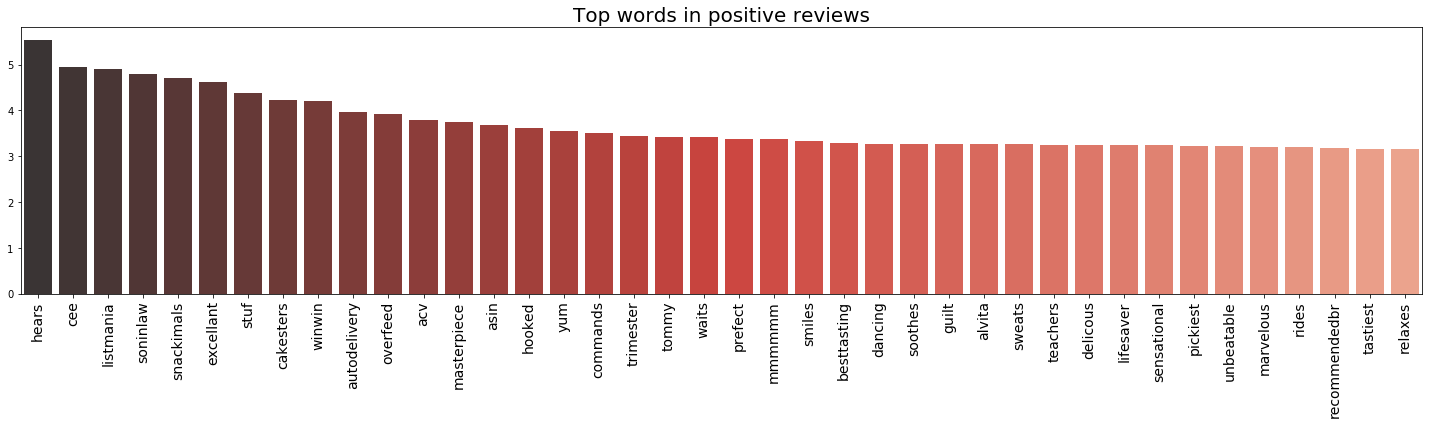

In [36]:
# plt.autolayout : True
# plt.tight_layout();
plt.figure(figsize=(20,6))
sns.barplot(list(dict_top_pos.keys()), list(dict_top_pos.values()), palette="Reds_d")
plt.xticks(rotation=90,fontsize=14);
plt.title('Top words in positive reviews',fontsize=20);
plt.tight_layout();
plt.savefig('word__freq_pos_rev.png')

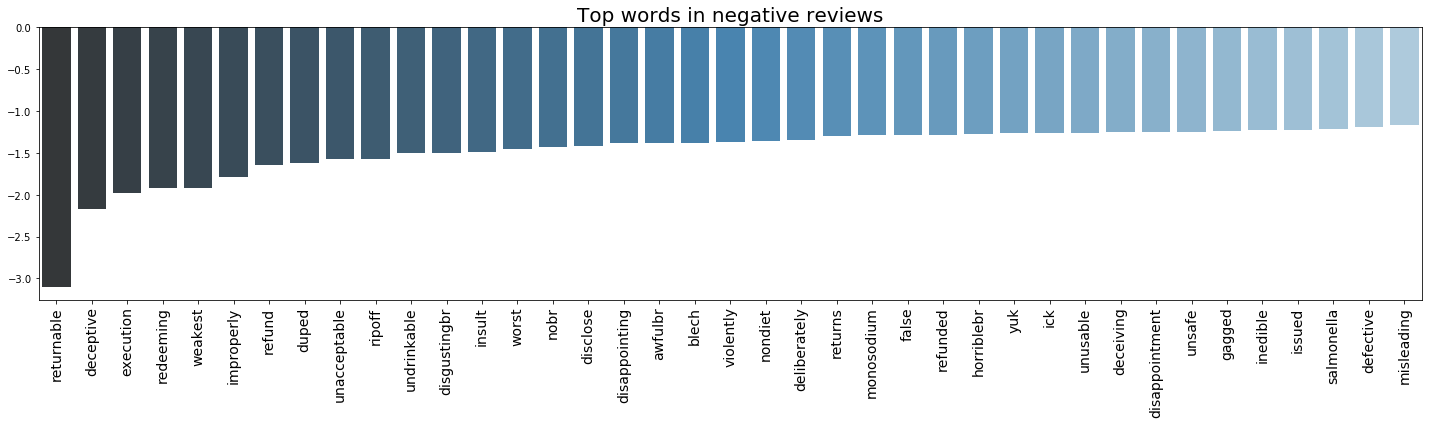

In [37]:
plt.figure(figsize=(20,6))
sns.barplot(list(dict_top_neg.keys()), list(dict_top_neg.values()), palette="Blues_d")
plt.xticks(rotation=90,fontsize=14);
plt.title('Top words in negative reviews',fontsize=20);
plt.tight_layout();
plt.savefig('word__freq_neg_rev.png')

Mean: 1.1207146656718976


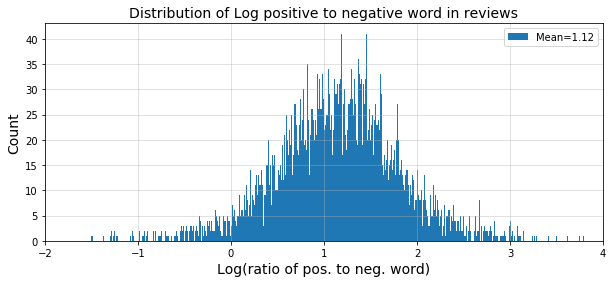

In [38]:
print('Mean:',np.mean(list(set(counter_pos_neg.values()))))
plt.figure(figsize=(10,4));
plt.hist(counter_pos_neg.values(),bins=2000,label='Mean=1.12');
plt.xlim(-2,4)

plt.xlabel('Log(ratio of pos. to neg. word)',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Distribution of Log positive to negative word in reviews',fontsize=14)
plt.grid(linewidth=0.5,alpha=0.75)
plt.legend(loc='upper right');
plt.savefig('distribution_log_pos_neg_word_review.png')

In [39]:
print(len(counter_pos_neg.most_common()),len(counter_pos.most_common()),len(counter_neg.most_common()),len(counter_total.most_common()))

9967 186454 92005 223134


In [189]:
print('%0.2f' %counter_pos_neg['neutral'],'%0.2f' %counter_pos_neg['diet'],'%0.2f' %counter_pos_neg['awful'],'%0.2f' %counter_pos_neg['food'])

0.86 1.26 -0.97 1.20


In [41]:

top_10000_common_words_dic=dict(counter_total.most_common()[0:10000])

In [42]:
top_10000_common_words_list=(list(top_10000_common_words_dic.keys()))
print(len(top_10000_common_words_list))

10000


In [43]:
word_to_index={}
index_to_word={}

for i,word in enumerate(top_10000_common_words_list):
    word_to_index[word]=i
    
for word,i in word_to_index.items():
    index_to_word[i]=word

# {'br': 0, 'like': 1, 'good': 2, 'taste': 3, 'great': 4, 'coffee': 5, 'product': 6, 'flavor': 7, 'tea': 8, 'love': 9, 'will': 10, 'food': 11, 'use': 12
#{0: 'br', 1: 'like', 2: 'good', 3: 'taste', 4: 'great', 5: 'coffee', 6: 'product', 7: 'flavor', 8: 'tea', 9: 'love', 10: 'will', 11: 'food', 12:

In [44]:
review_vec_index=[]
review_label=[]
review_score=[]

for i in tqdm(range(len(review_vec))):
    
    len_rev=len(review_vec[i])
    if(len_rev>0 and len_rev<1750):  #clean very short and very long reviews
        indices = set()
        for word in review_vec[i]:
            if word in word_to_index.keys():
                indices.add(word_to_index[word])
        review_vec_index.append(list(indices))
        review_label.append(score_vec[i])
        review_score.append(actual_score_vec[i])
                
print(len(review_vec_index),len(review_label),len(review_score))               


560380 560380 560380


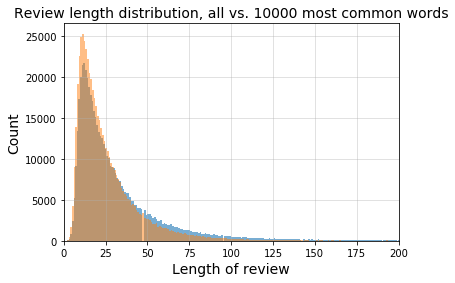

In [45]:
review_len_vec = pd.Series(review_vec).apply(lambda x: len(x)) 
review_len_vec_index = pd.Series(review_vec_index).apply(lambda x: len(x))

review_len_vec.hist(bins=1750,alpha=0.6,label='all words');
review_len_vec_index.hist(bins=589,alpha=0.5,label='10000 most common');
plt.xlim(0,200)
#plt.ylim(0,500)
plt.grid(linewidth=0.5,alpha=0.75)
plt.xlabel('Length of review',fontsize=14);
plt.ylabel('Count',fontsize=14);

plt.title('Review length distribution, all vs. 10000 most common words',fontsize=14);
plt.savefig('review_length_dist_before_after.png')

count    560380.000000
mean          0.780624
std           0.413824
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
dtype: float64


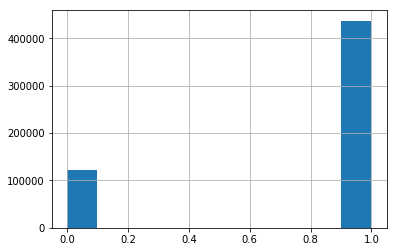

In [46]:
print(pd.Series(review_label).describe())
score_vec.hist()

In [47]:
review_len_vec_index.describe()

count    560380.000000
mean         25.400057
std          20.670301
min           1.000000
25%          12.000000
50%          19.000000
75%          31.000000
max         589.000000
dtype: float64

In [48]:
review_len_vec.describe()

count    560388.000000
mean         32.635103
std          33.231581
min           0.000000
25%          14.000000
50%          23.000000
75%          39.000000
max        1714.000000
Name: Review_word_list, dtype: float64

In [49]:
for i,review in enumerate(review_vec_index):
    if(i<3):
        print(i,review_vec_index[i],review_label[i],review_score[i])

0 [352, 1, 2, 8259, 6, 872, 4745, 4842, 11, 77, 2235, 1421, 21, 22, 246, 283, 61, 31] 1 5
1 [1186, 964, 6, 3272, 1802, 1773, 173, 7437, 1649, 2769, 5371, 734, 63] 0 1
2 [9344, 524, 2709, 1942, 28, 1948, 160, 6694, 41, 172, 302, 303, 946, 448, 326, 2125, 80, 1491, 4439, 7384, 7517, 861, 114, 1651, 7413, 5110, 1787, 2174, 383] 1 4


In [50]:
review_score=np.array(review_score)
review_vec_index=np.array(review_vec_index)

In [51]:
max_per_pos_neg=75000
counter_pos=0
counter_neg=0
review_vec_index_even=[]
review_label_even=[]
review_score_even=[]

for i in tqdm(range(len(review_score))):
    if((review_score[i]==5 or review_score[i]==4) and counter_pos<max_per_pos_neg):
        
        review_vec_index_even.append(review_vec_index[i])
        review_label_even.append(review_label[i])
        review_score_even.append(review_score[i])
        counter_pos=counter_pos+1
        
    if((review_score[i]==1 or review_score[i]==2) and counter_neg<max_per_pos_neg):
        
        review_vec_index_even.append(review_vec_index[i])
        review_label_even.append(review_label[i])
        review_score_even.append(review_score[i])
        counter_neg=counter_neg+1        
        
        

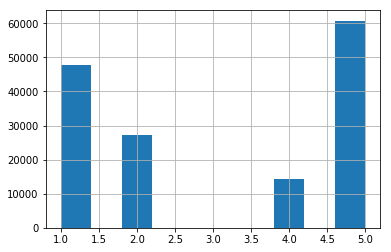

In [52]:
pd.Series(review_score_even).hist()

In [53]:
review_vec_index_pad=sequence.pad_sequences(review_vec_index_even,maxlen=100)
review_label=np.array(review_label_even)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(review_vec_index_pad, review_label, test_size=0.33, random_state=42)

In [57]:
y_train.sum()/review_label.sum()

0.6709466666666667

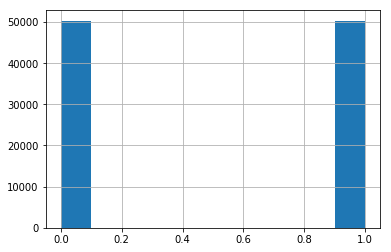

In [58]:
pd.Series(y_train).hist()

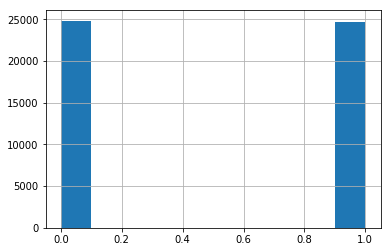

In [59]:
pd.Series(y_test).hist()

In [60]:
model_data_input=pd.DataFrame(dict(X_even=review_vec_index_pad.tolist(),y_even=review_label)) #,'y_even':review_label})

In [61]:
model_data_input.to_csv('model_data_input_even.csv',index=False)

In [2]:
model_data_input=pd.read_csv('model_data_input_even.csv')

In [3]:
review_vec_index_pad=model_data_input['X_even'].apply(lambda x: np.asarray(eval(x),dtype='int32')).values
review_label=model_data_input['y_even'].values

In [4]:
review_label

array([1, 0, 1, ..., 0, 0, 0])

In [5]:
review_vec_index_pad[0].shape

(100,)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(review_vec_index_pad, review_label, test_size=0.33, random_state=42)

In [65]:
max_feature=10000
max_len=100
embedding_dim=100

model=Sequential()
model.add(layers.Embedding(max_feature,embedding_dim,input_length=max_len))
model.add(layers.GRU(32,dropout=0.1,recurrent_dropout=0.5,return_sequences=True))
model.add(layers.GRU(64,activation='tanh',dropout=0.1,recurrent_dropout=0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
gru_3 (GRU)                  (None, 100, 32)           12768     
_________________________________________________________________
gru_4 (GRU)                  (None, 64)                18624     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,031,457
Trainable params: 1,031,457
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(optimizer=Adam(lr=1e-3),loss='binary_crossentropy',metrics=['acc'])

callbacks_list=[keras.callbacks.ModelCheckpoint(filepath='my_model_bestrun_gru.h5',save_best_only=True,verbose=1,)]
history=model.fit(X_train,y_train,epochs=5,batch_size=128,validation_split=0.2,callbacks=callbacks_list)

Train on 80400 samples, validate on 20100 samples
Epoch 1/5
80400/80400 [==============================] - 229s 3ms/step - loss: 0.3563 - acc: 0.8465 - val_loss: 0.2927 - val_acc: 0.8836

Epoch 00001: val_loss improved from inf to 0.29269, saving model to my_model.h5
Epoch 2/5
80400/80400 [==============================] - 232s 3ms/step - loss: 0.2676 - acc: 0.8943 - val_loss: 0.2777 - val_acc: 0.8895

Epoch 00002: val_loss improved from 0.29269 to 0.27775, saving model to my_model.h5
Epoch 3/5
80400/80400 [==============================] - 234s 3ms/step - loss: 0.2424 - acc: 0.9070 - val_loss: 0.2800 - val_acc: 0.8893

Epoch 00003: val_loss did not improve from 0.27775
Epoch 4/5
80400/80400 [==============================] - 228s 3ms/step - loss: 0.2243 - acc: 0.9153 - val_loss: 0.2818 - val_acc: 0.8875

Epoch 00004: val_loss did not improve from 0.27775
Epoch 5/5
80400/80400 [==============================] - 244s 3ms/step - loss: 0.2094 - acc: 0.9215 - val_loss: 0.2800 - val_acc: 0.

In [67]:
model.save('my_model_endrun_gru.h5')
model_endrun_gru = keras.models.load_model('my_model_endrun_gru.h5')
model_endrun_gru.evaluate(X_test,y_test)

49500/49500 [==============================] - 96s 2ms/step


[0.2831436810517552, 0.8894141414093248]

In [68]:
model_bestrun_gru = keras.models.load_model('my_model_bestrun_gru.h5')

In [69]:
model_bestrun_gru.evaluate(X_test,y_test)

49500/49500 [==============================] - 94s 2ms/step


[0.2800899512370427, 0.8871515151466987]

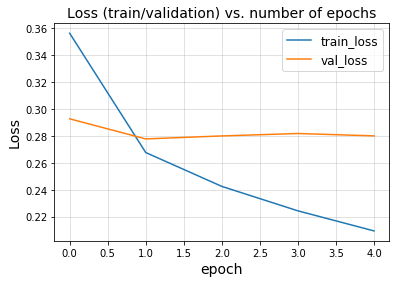

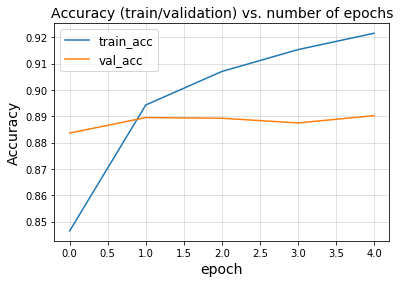

In [206]:
list_epoch=np.arange(0,5)
plt.plot(list_epoch,history.history['loss'])
plt.plot(list_epoch,history.history['val_loss'])
plt.ylabel('Loss',fontsize=14)
plt.xlabel('epoch',fontsize=14)
plt.grid(linewidth=0.5,alpha=0.75)
plt.legend(['train_loss','val_loss'],fontsize=12)
plt.title('Loss (train/validation) vs. number of epochs',fontsize=14)
plt.savefig('loss_epoch.png')
plt.show()


plt.plot(list_epoch,history.history['acc'])
plt.plot(list_epoch,history.history['val_acc'])
plt.ylabel('Accuracy',fontsize=14)
plt.legend(['train_acc','val_acc'],fontsize=12)
plt.grid(linewidth=0.5,alpha=0.75)
plt.title('Accuracy (train/validation) vs. number of epochs',fontsize=14)
plt.xlabel('epoch',fontsize=14)
plt.savefig('accuracy_epoch.png')
plt.show()

In [72]:

embedding_matrix=model_bestrun_gru.layers[0].get_weights()[0]

In [132]:
prediction=model_bestrun_gru.predict(X_test)

In [154]:
prediction_proba=model_bestrun_gru.predict_proba(X_test)

In [134]:
prediction_round=np.round(prediction)
y_test_vec=y_test.reshape(y_test.shape[0],1)

In [137]:
print('Accuracy:',(y_test_vec==prediction_round).mean())

Accuracy: 0.8871515151515151


In [155]:
from sklearn.metrics import f1_score,accuracy_score,auc,confusion_matrix,roc_curve,roc_auc_score

In [186]:
print('Accuracy: \n \n%0.2f'%accuracy_score(y_test_vec, prediction_round))
print('\nconfusion matrix: \n \n',confusion_matrix(y_test_vec, prediction_round))
print('\nF1 score: \n \n%0.2f' % f1_score(y_test_vec, prediction_round))      

Accuracy: 
 
0.89

confusion matrix: 
 
 [[21875  2946]
 [ 2640 22039]]

F1 score: 
 
0.89


In [161]:
y_test_vec_n=y_test_vec.reshape(49500)
prediction_proba_n=prediction_proba.reshape(49500)

In [167]:
prediction_proba_n[:]

array([0.97561055, 0.98047584, 0.80842024, ..., 0.03008995, 0.01292139,
       0.98072433], dtype=float32)

In [181]:
n_classes=1

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(np.array(y_test_vec_n), np.array(prediction_proba_n))
    #print(fpr)
    #print(tpr)
    roc_auc = auc(fpr, tpr)
    print('ROC_AUC %0.2f '% roc_auc)



ROC_AUC 0.95 


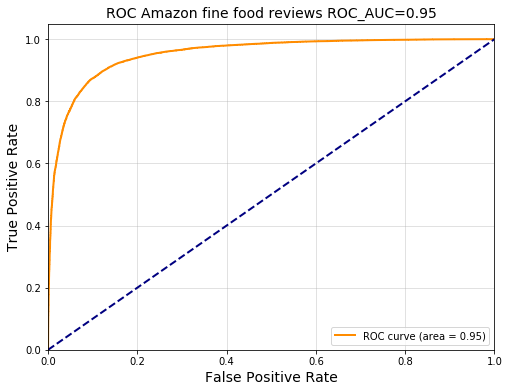

In [221]:
plt.figure(figsize=(8,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC Amazon fine food reviews ROC_AUC=0.95',fontsize=14)
plt.legend(loc="lower right")
plt.grid(linewidth=0.5,alpha=0.75)
plt.savefig('roc_auc.png')
plt.show()

In [74]:
embedding_coeff_dict={}

for word,index in word_to_index.items():  #from imdb vocabulary
    
    if((index<max_feature) and (embedding_matrix[index] is not None)):
        
        embedding_coeff_dict[word]=embedding_matrix[index]  #coeff to dictionary


In [75]:
def most_similar_words(focus):   #cosine similarity
    most_similar = Counter()

    for word in word_to_index.keys():
        most_similar[word] = np.dot(embedding_coeff_dict[word],embedding_coeff_dict[focus])
        #vector weights on hidden layer dot product, higher cosine more simialr vector
    return most_similar.most_common()

In [78]:
most_similar_words("awful") [0:10]

[('worst', 1.9740562),
 ('awful', 1.6797752),
 ('disappointment', 1.675684),
 ('disappointing', 1.6331913),
 ('discolored', 1.6090478),
 ('cancelled', 1.5944307),
 ('hopes', 1.5827065),
 ('return', 1.5617919),
 ('returning', 1.4889911),
 ('rip', 1.4704638)]

In [79]:
most_similar_words("excellent") [0:10]

[('pleasantly', 0.9292165),
 ('burritos', 0.8688582),
 ('perfect', 0.8527036),
 ('drawback', 0.85219276),
 ('hooked', 0.8108946),
 ('beat', 0.80763733),
 ('delicious', 0.8006685),
 ('downside', 0.7903584),
 ('antiinflammatory', 0.7643028),
 ('peterson', 0.7620946)]

In [80]:
np.dot(embedding_coeff_dict['excellent'],embedding_coeff_dict['great'])

0.6602152

In [81]:
np.dot(embedding_coeff_dict['excellent'],embedding_coeff_dict['awful'])

-0.8194053

In [82]:
np.dot(embedding_coeff_dict['dog'],embedding_coeff_dict['cat'])

-0.010381427

In [89]:
import matplotlib.colors as colors

words_to_visualize = list()
for word, ratio in counter_pos_neg.most_common(200):
    if(word in embedding_coeff_dict.keys()):
        words_to_visualize.append(word)
    
for word, ratio in list(reversed(counter_pos_neg.most_common()))[0:200]:
    if(word in embedding_coeff_dict.keys()):
        words_to_visualize.append(word)

In [90]:
pos = 0
neg = 0

colors_list = list()
vectors_list = list()
for word in words_to_visualize:
    if word in counter_pos_neg.keys():
        vectors_list.append(embedding_coeff_dict[word])
        if(counter_pos_neg[word] > 0):
            pos+=1
            colors_list.append("#00ff00")
        else:
            neg+=1
            colors_list.append("#000000")

In [91]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
words_top_ted_tsne = tsne.fit_transform(vectors_list)

In [92]:
import bokeh
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="vector T-SNE for most polarized words")

source = ColumnDataSource(data=dict(x1=words_top_ted_tsne[:,0],
                                    x2=words_top_ted_tsne[:,1],
                                    names=words_to_visualize,
                                    color=colors_list))

p.scatter(x="x1", y="x2", size=8, source=source, fill_color="color")

word_labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="10pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(word_labels)

show(p)

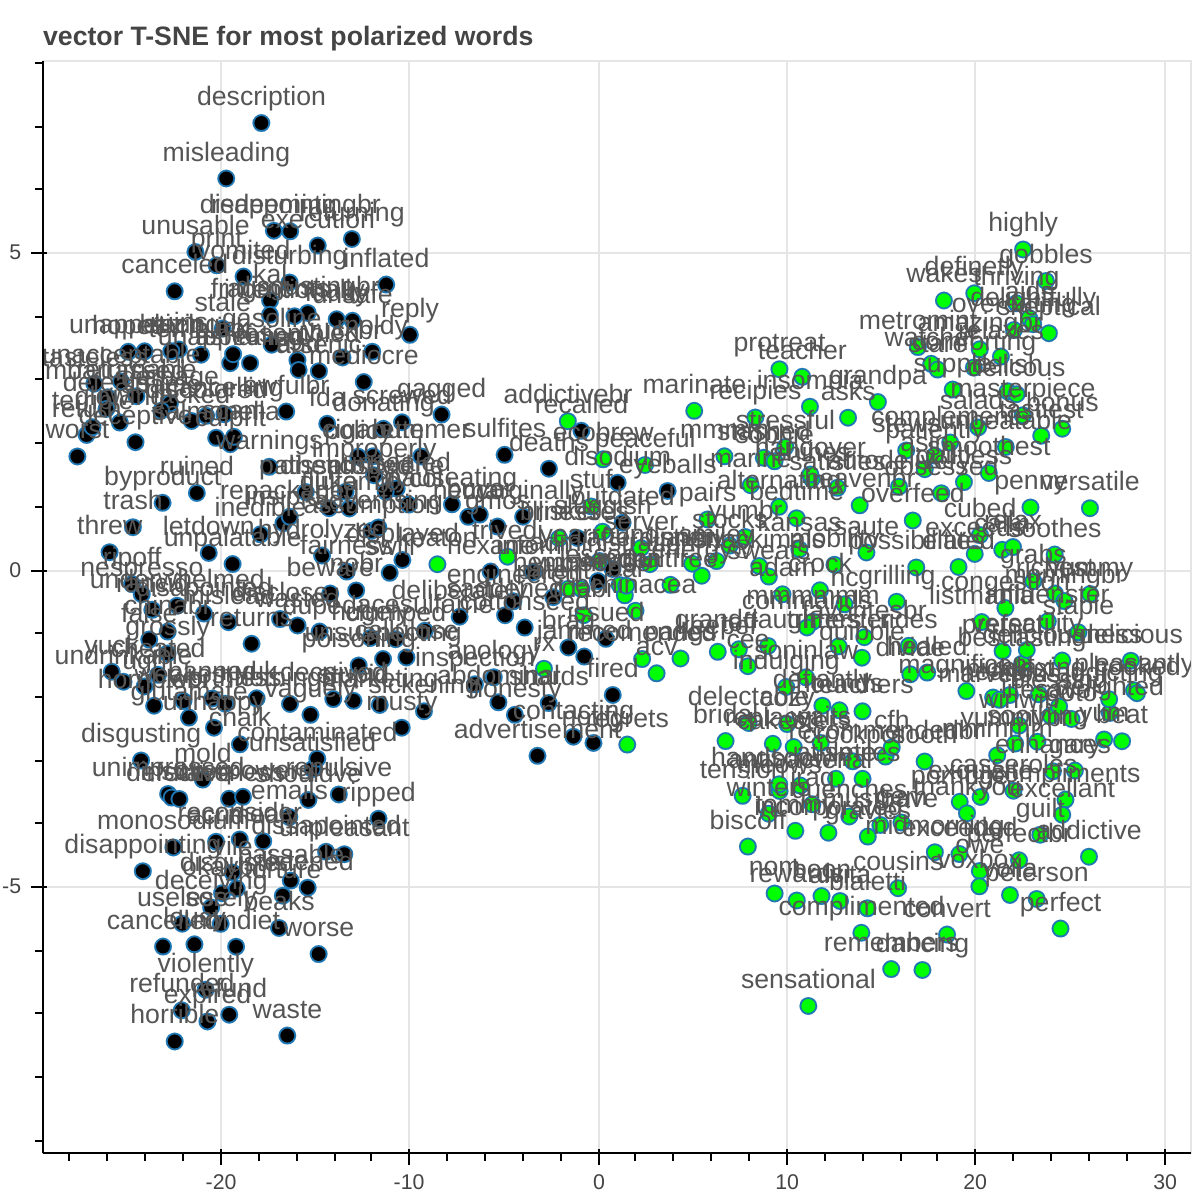

In [227]:
from IPython.display import Image
Image(filename='zoom_out_t-SNE_200.png') 


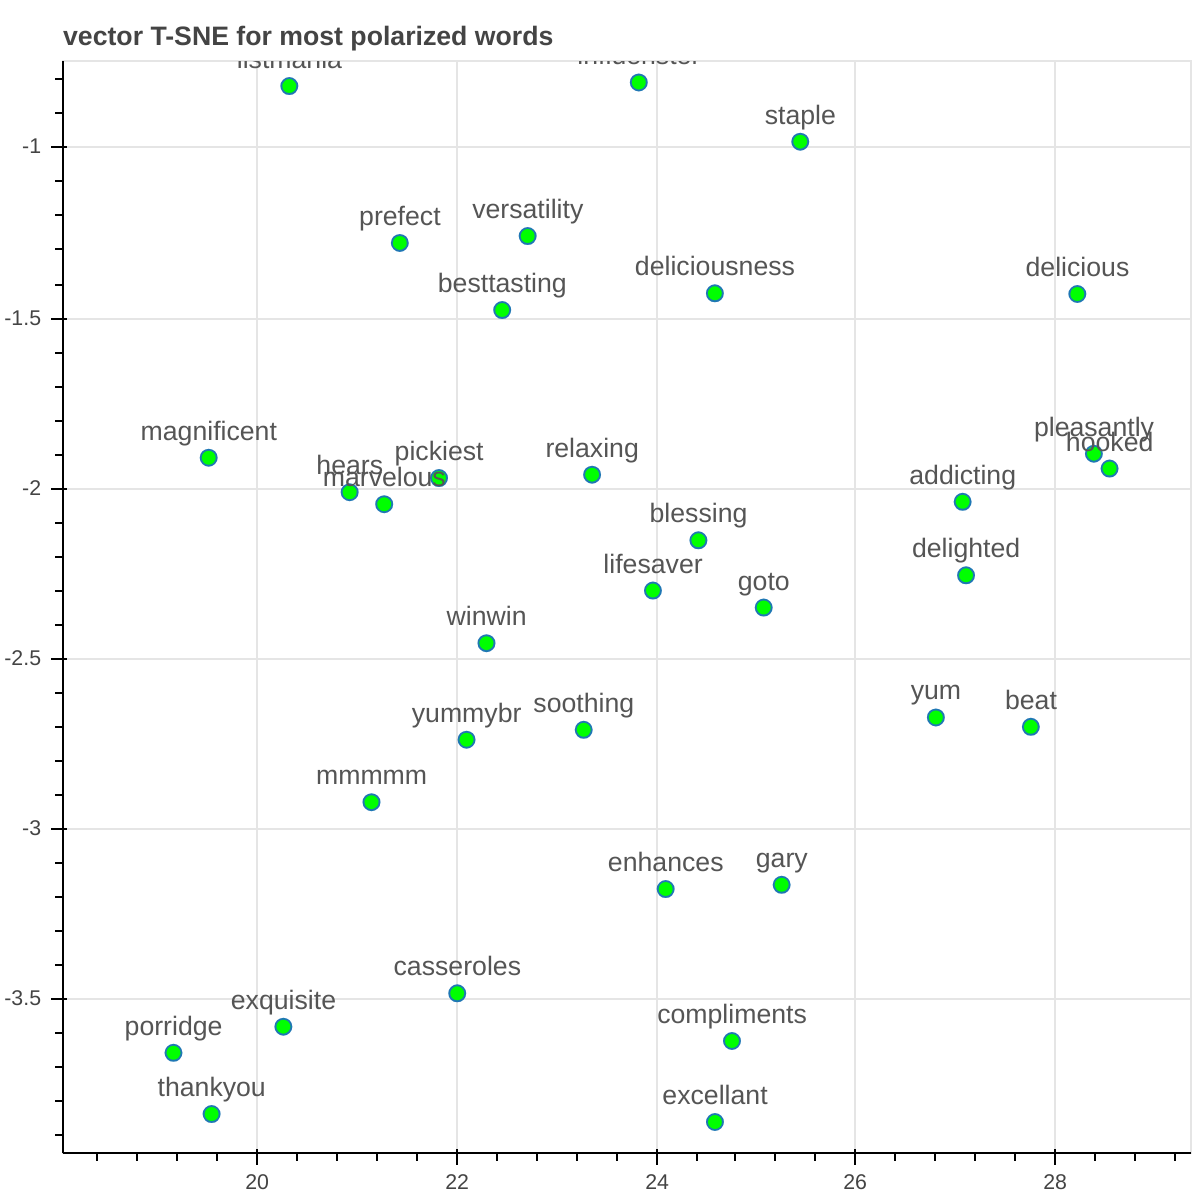

In [228]:
Image(filename='zoom_in_pos_t-SNE_200.png') 

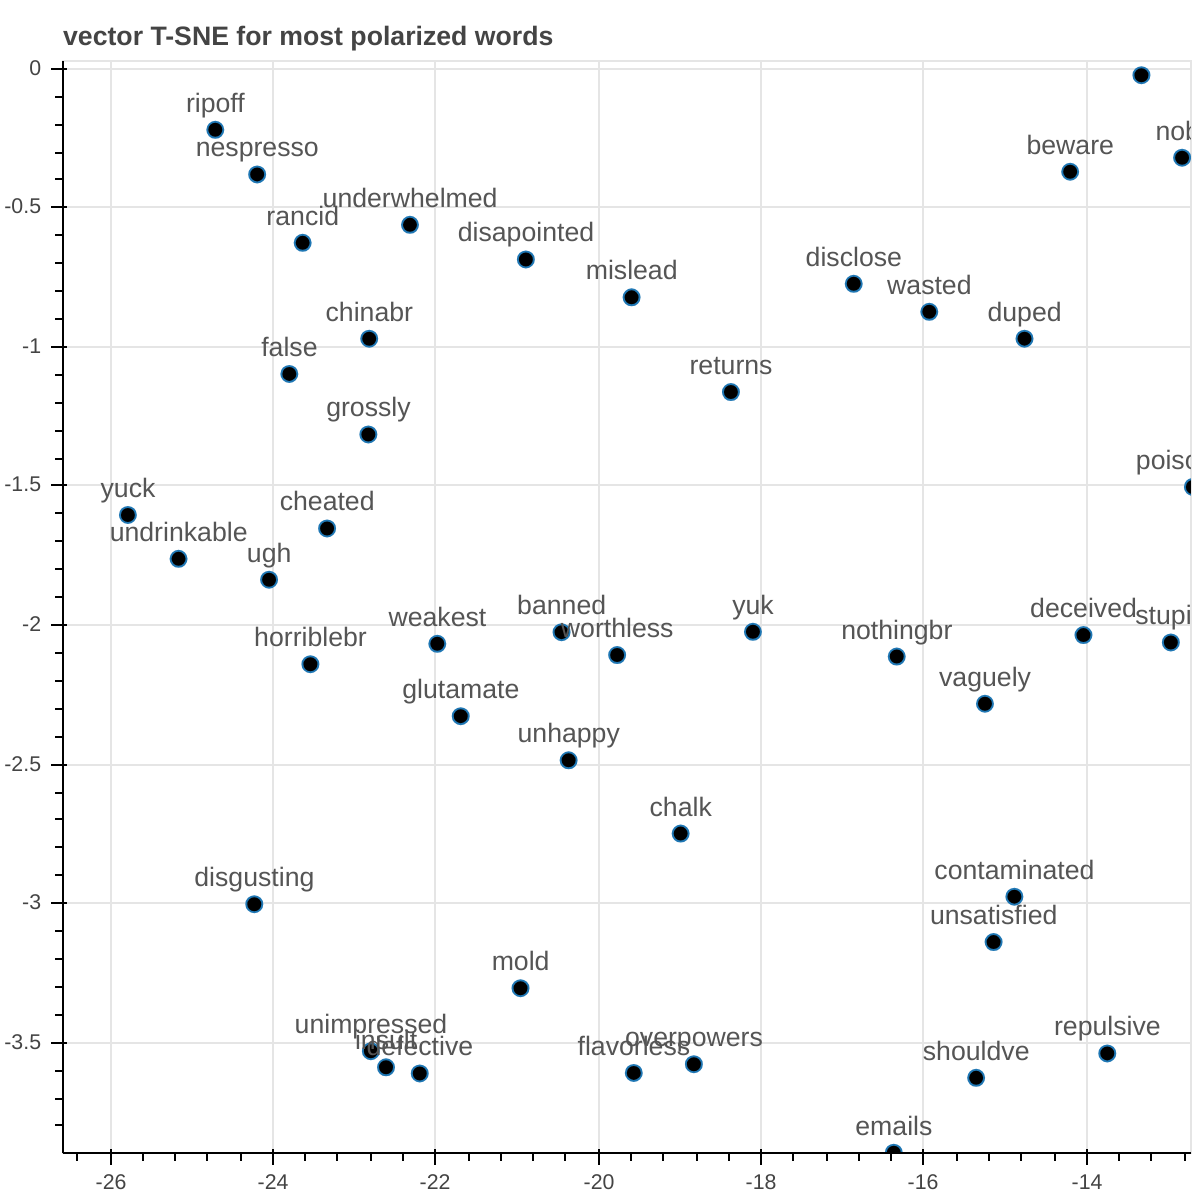

In [229]:
Image(filename='zoom_in_neg_t-SNE_200.png') 